In [16]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [17]:
#loading the dataset
df = pd.read_csv('home_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Some Numerical Information about the Data

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [31]:
df.nunique()

id               21436
date               372
price             4032
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

## Data Cleaning

In [18]:
# Redefine date column to year and month
df['date'] = df['date'].str[2:6]

In [19]:
# Define a function to change type of bathroom column to int  
def round_x(x):
    return (int(x+0.25))

df['bathrooms'] = df['bathrooms'].apply(lambda x :round_x(x))

In [20]:
# Define a function for reduce uniques of yr_renivated column to two value (0,1)
def year(x):
    if x == 0 :
        return 0
    else :
        return 1

df['yr_renovated'] = df['yr_renovated'].apply(lambda x : year(x))

In [21]:
# Reduce unique values of floor column
df['floors'] = df['floors'].apply(lambda x : 3 if x == 3.5 else x)

In [22]:
# Drop outlayers
df = df[df['price']<2000000]

## Data Visualization

In [8]:
# Define list of Continuous columns Names
continuous = ['price', 'sqft_living']

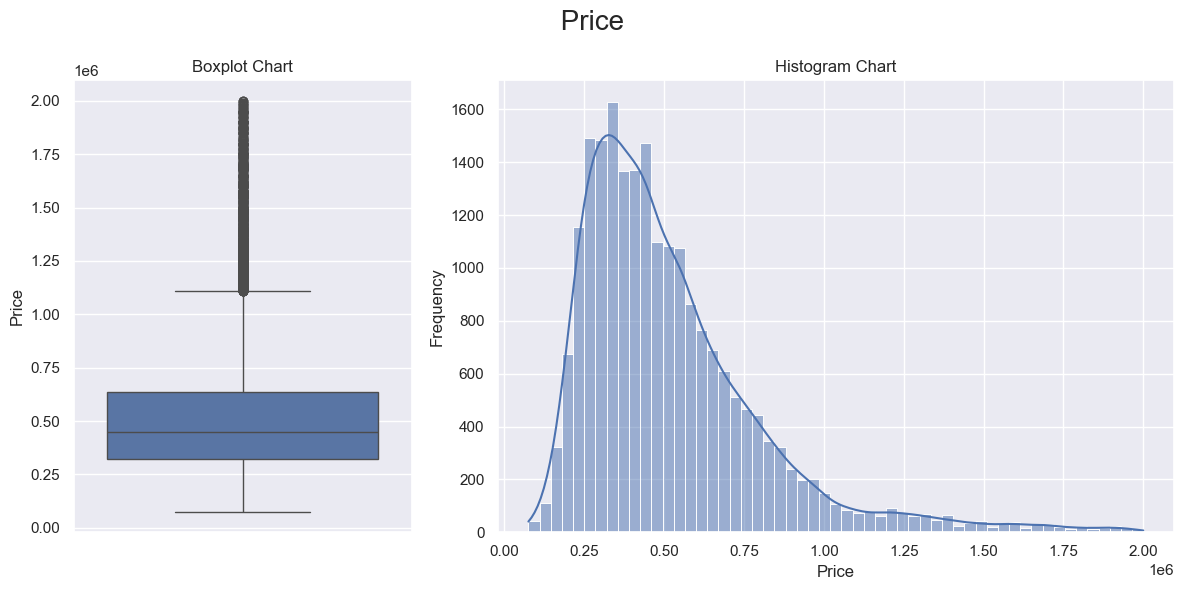

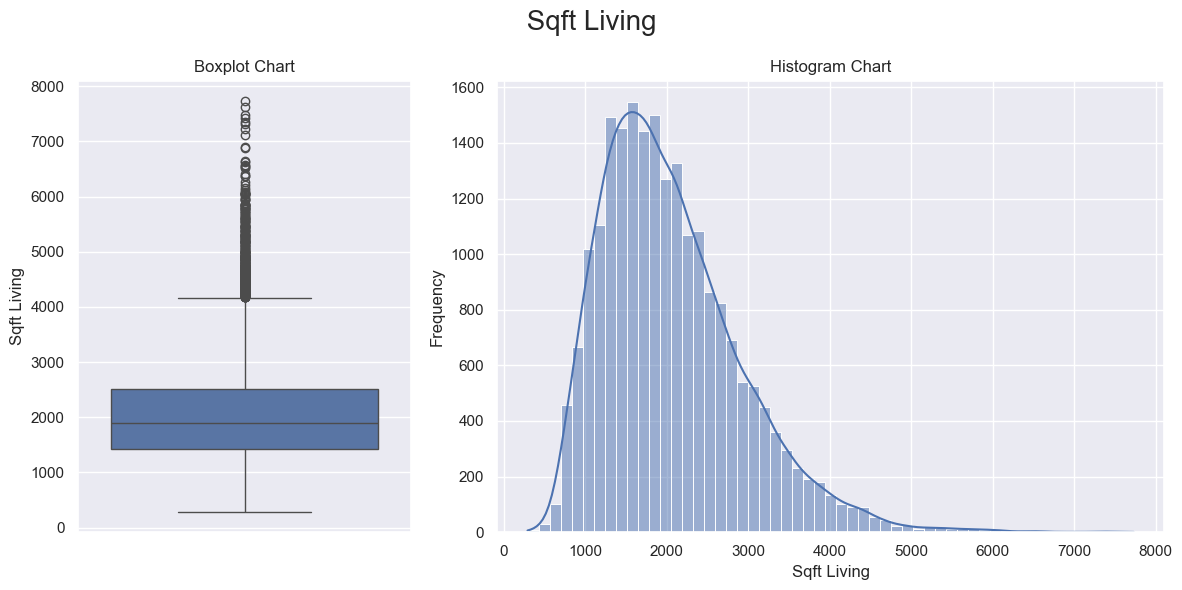

In [9]:
# Define a function to Capitalize the first element of string and remove '_' character
def title(name):
    return (' '.join(word.capitalize()for word in name.split('_')))


# Distribution of Categorical Features
def plot_continious_distribution(df, column):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(title(column))

    sns.histplot(x = df[column], kde=True, ax=ax[1], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(title(column))

    plt.tight_layout()    
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti)    

In [10]:
# Define list of Categorical columns Names
categorical = ['waterfront', 'yr_renovated', 'floors', 'condition', 'view']

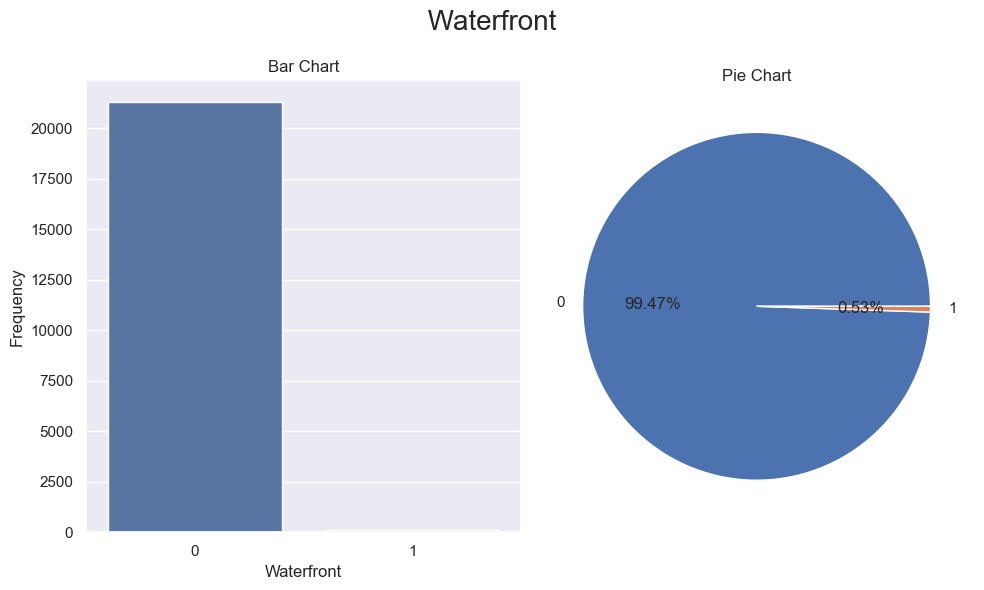

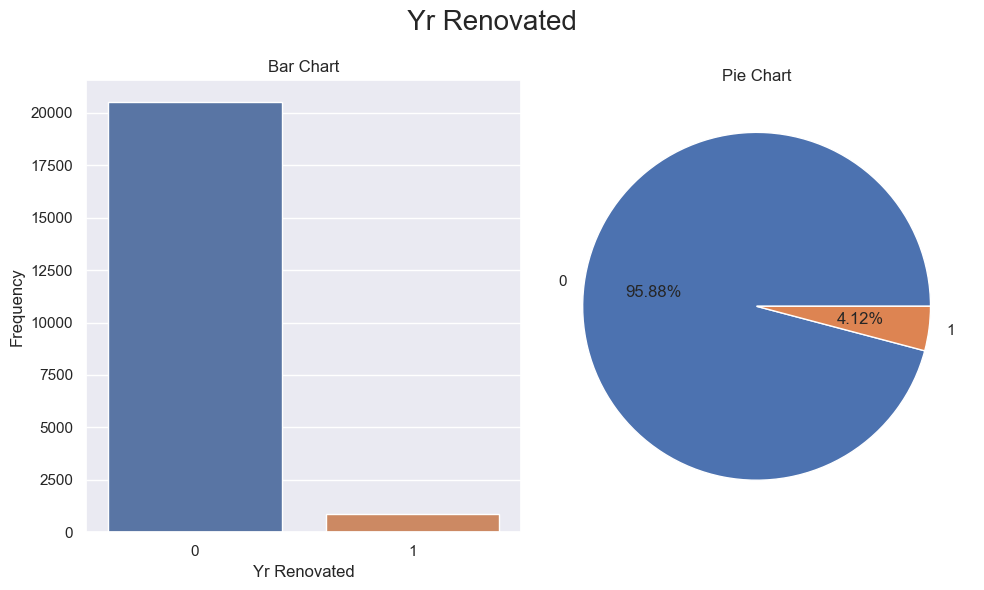

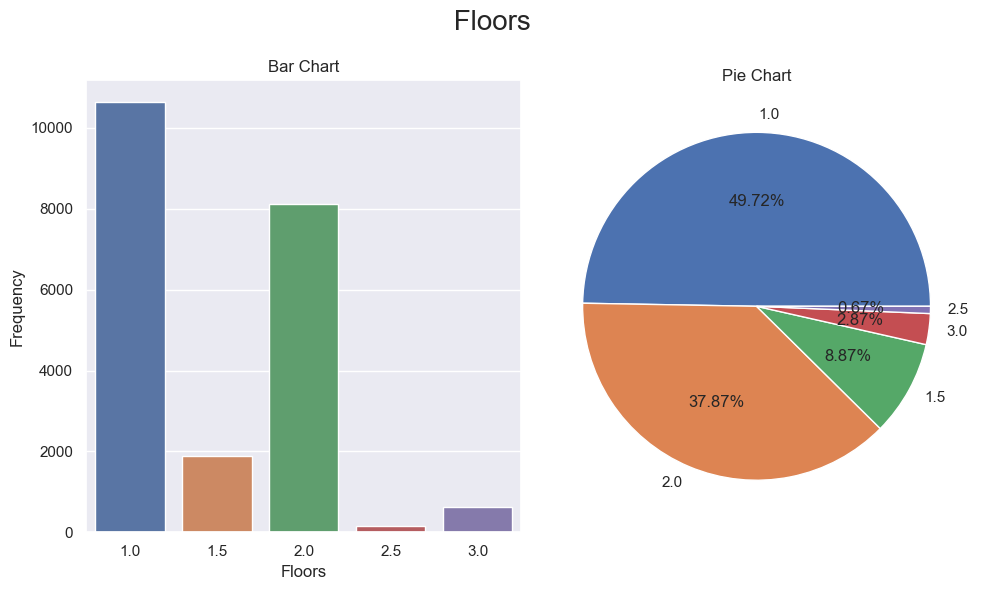

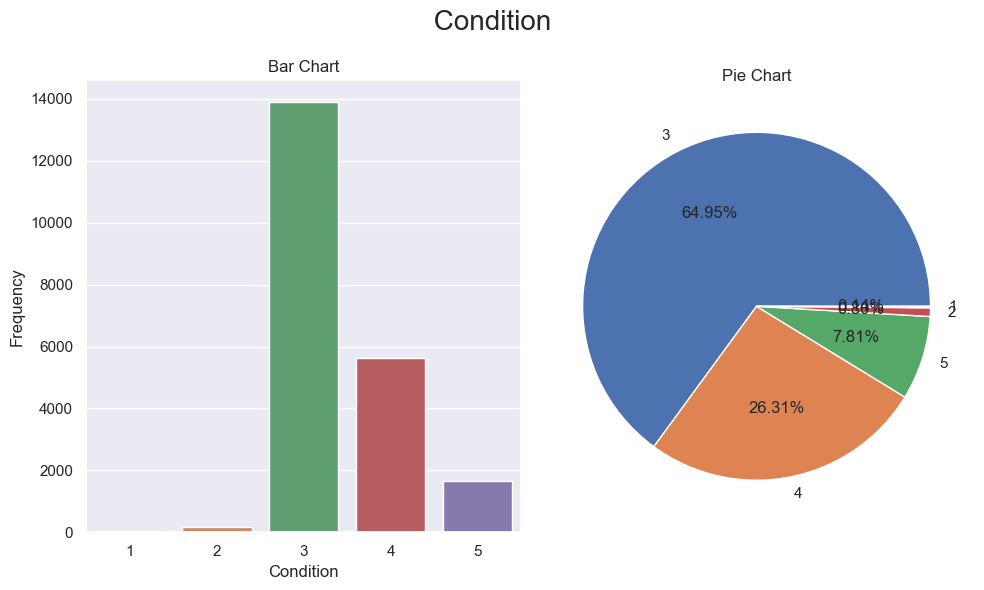

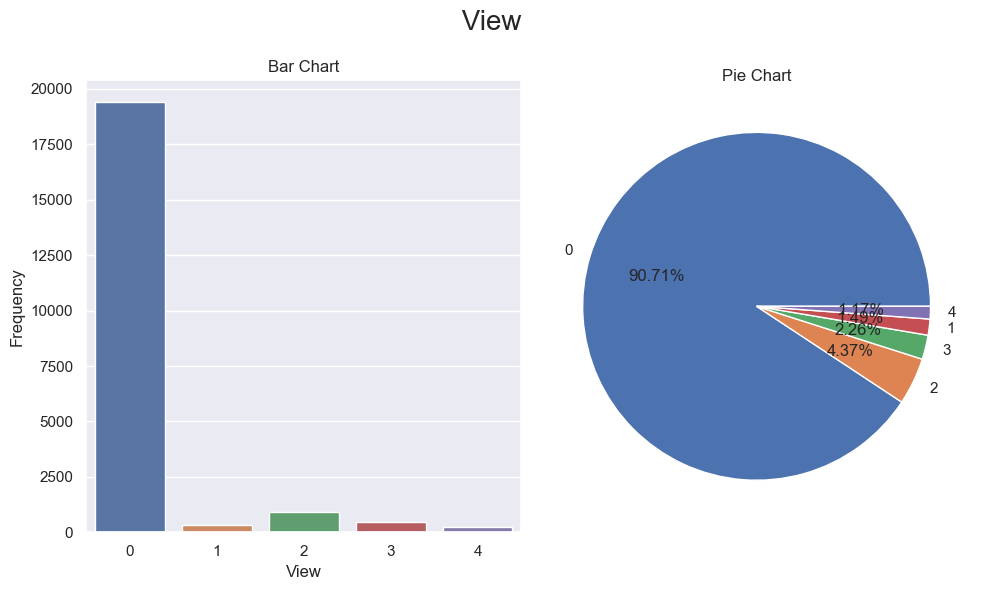

In [11]:
# distribution of categorical features

def plot_categorical_distribution(df, column):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.barplot(df[column].value_counts(), ax=ax[0], palette='deep')
    ax[0].set_title('Bar Chart')
    ax[0].set_xlabel(title(column))
    ax[0].set_ylabel('Frequency')
    
    
    df[column].value_counts().plot(kind='pie', autopct="%.2f%%", ax=ax[1])
    ax[1].set_title('Pie Chart')
    ax[1].set_ylabel(None)
    
    plt.tight_layout()
    plt.show()
    
for cat in categorical:
    plot_categorical_distribution(df, cat)

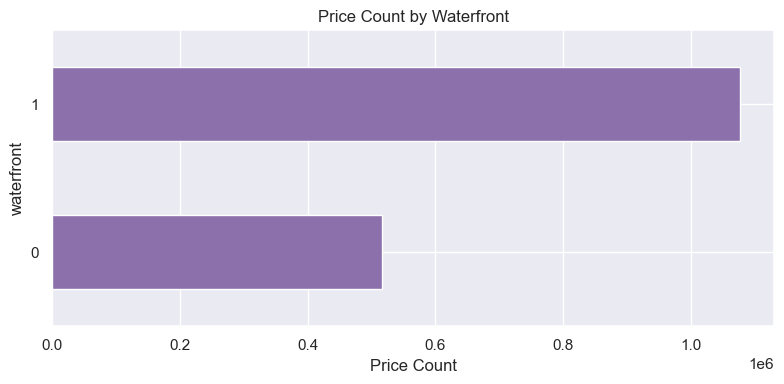

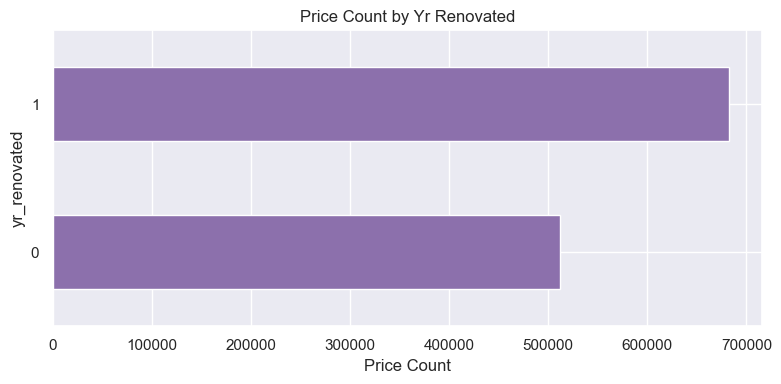

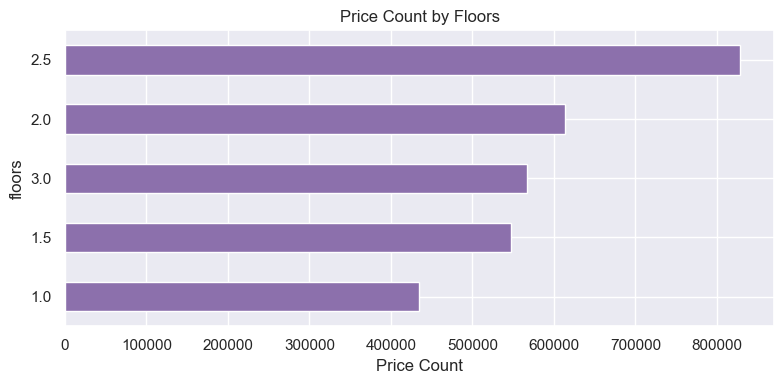

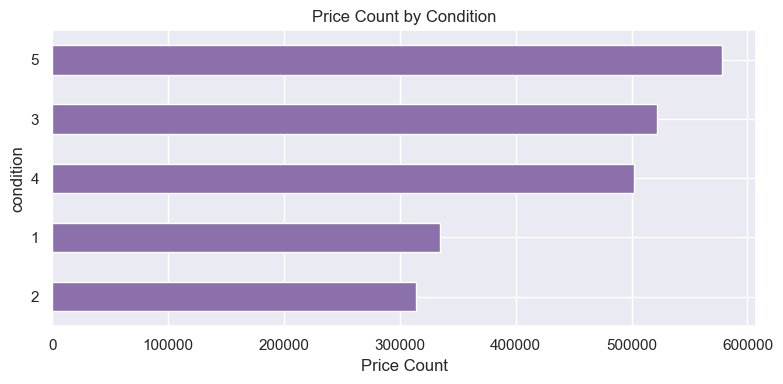

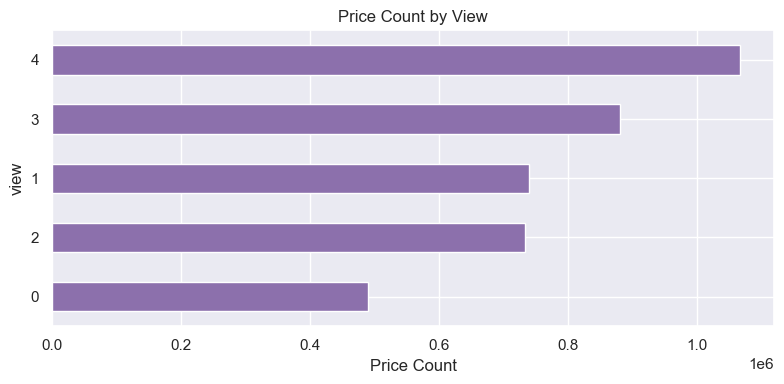

In [23]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x])[y].mean()
    barh.sort_values(ascending=True, inplace=True)
    barh.plot(kind='barh',  color = '#8c70ac', figsize=(8,4))
    plt.title(f'{title(y)} Count by {title(x)}')
    plt.xlabel(f'{title(y)} Count')
    plt.ylabel(x)

    plt.tight_layout()
    plt.show()

bar_plot('waterfront', 'price', df)
bar_plot('yr_renovated', 'price', df)
bar_plot('floors', 'price', df)
bar_plot('condition', 'price', df)
bar_plot('view', 'price', df)

## Data Preprocessing

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
stc = StandardScaler()

stc_cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',  'sqft_lot15', 'sqft_living15', 'long', 'lat', ]

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

## Training and Evaluating Different Models

In [14]:
from sklearn.model_selection import train_test_split 

x = df.drop(['price', 'id'], axis=1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [51]:
#Importing the Libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
# List of Mdels to Try
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error = {round(mse,3)}, R-squared = {round(r2, 3)}')

Linear Regression: Mean Squared Error = 0.279, R-squared = 0.723
Ridge Regression: Mean Squared Error = 0.279, R-squared = 0.723
Decision Tree: Mean Squared Error = 0.234, R-squared = 0.768
Random Forest: Mean Squared Error = 0.122, R-squared = 0.879
Gradient Boosting: Mean Squared Error = 0.132, R-squared = 0.869
K-Nearest Neighbors: Mean Squared Error = 0.194, R-squared = 0.808


In [54]:
rf_model_best = RandomForestRegressor(max_depth= 20, n_estimators= 200)
rf_model_best.fit(x_train, y_train)

# Predict using the updated features
y_pred_best = rf_model_best.predict(x_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Mean Squared Error (Tuned Random Forest): {round(mse_best, 3)}')
print(f'R-squared (Tuned Random Forest): {round(r2_best, 3)}')


Mean Squared Error (Tuned Random Forest): 0.118
R-squared (Tuned Random Forest): 0.883


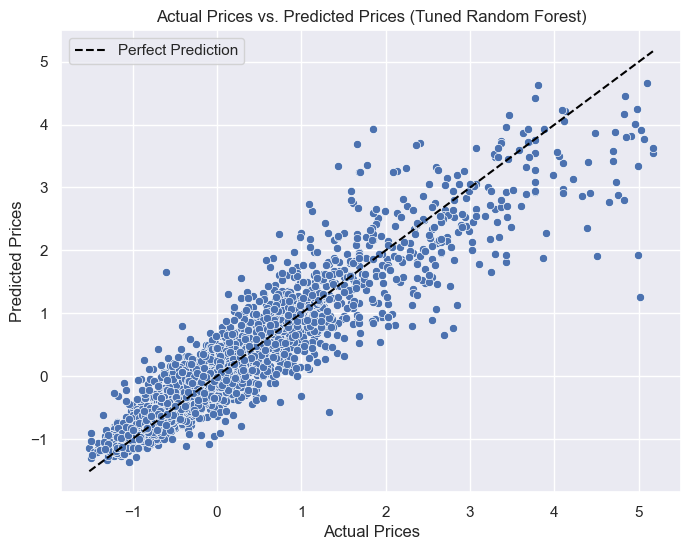

In [56]:
# Visualize the Predicted Prices Against the Actual Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='black', label='Perfect Prediction')
plt.title('Actual Prices vs. Predicted Prices (Tuned Random Forest)')
plt.ylabel('Predicted Prices')
plt.xlabel('Actual Prices')
plt.legend()
plt.show()

### Summary and Conclusion for House Price Prediction Dataset

In this project, we aimed to predict house prices using a given dataset. The steps involved in the data preprocessing and model training are outlined below:

1. Date Column Transformation:
   - The date column was transformed into a more suitable format to ensure it could be effectively used in the model.

2. Reduction of Unique Values:
   - For certain columns, the number of unique values was reduced. This was done to simplify the model and improve its performance.

3. Removal of Outliers:
   - Outliers were identified and removed from the dataset to ensure the model was not adversely affected by extreme values.

4. Data Visualization:
   - Appropriate visualizations were created to understand the data distribution and relationships between different features. This step provided valuable insights into the dataset.

5. Standardization:
   - The data was standardized to ensure that all features contributed equally to the model training process. This involved scaling numerical features to a common range.

6. Model Training:
   - A Random Forest model was trained on the preprocessed data. This model was chosen for its robustness and ability to handle complex datasets.

7. Model Performance:
   - The trained Random Forest model achieved an accuracy of 88.3%. This indicates that the model performs well in predicting house prices based on the given features.

### Conclusion

The steps taken in this project, from data preprocessing to model training, demonstrate a systematic approach to handling a house price prediction dataset. The transformation of the date column, reduction of unique values, removal of outliers, data visualization, and standardization were crucial in preparing the data for modeling. The Random Forest model proved to be effective, achieving a solid accuracy of 88.3%. This project highlights the importance of thorough data preprocessing and the application of a robust machine learning model in achieving accurate predictions.

This structured approach can be replicated and adapted for similar datasets to ensure effective data analysis and model performance.
### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com